In [1]:
import torch.nn.functional as F
from torch.utils.data import DataLoader

from inpainting import transforms
from inpainting.load import SequenceDataset
from inpainting.utils import tensor_to_pil_image, flow_tensor_to_image_tensor, warp_tensor, normalize_flow, get_paths

In [2]:
dataset = SequenceDataset(
    get_paths(f'../data/interim/demo/Images/breakdance'),
    'image',
    sequence_length=2,
    transform=transforms.ToTensor()
)
data_loader = DataLoader(dataset, batch_size=1, shuffle=False)

In [3]:
prev_image, curr_image = next(iter(data_loader))
prev_image, curr_image = prev_image.cuda(), curr_image.cuda()

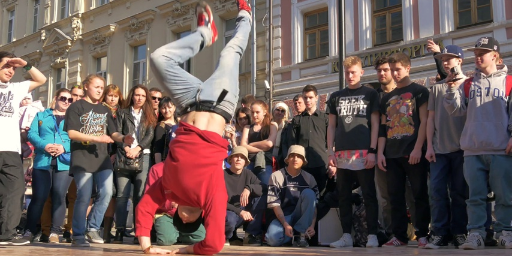

In [4]:
tensor_to_pil_image(prev_image)

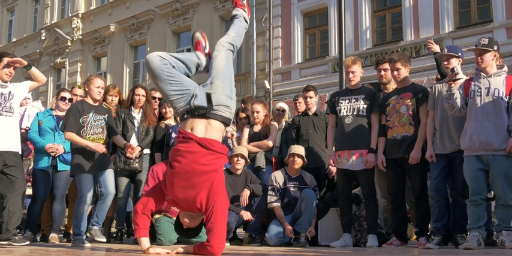

In [5]:
tensor_to_pil_image(curr_image)

In [6]:
from inpainting.flow.flownet2.model import FlowNet2Model

_, _, w, h = curr_image.size()
scaled_prev_image = F.interpolate(prev_image, size=[w // 64 * 64, h // 64 * 64])
scaled_curr_image = F.interpolate(curr_image, size=[w // 64 * 64, h // 64 * 64])

model = FlowNet2Model('../models/flow/flownet2/FlowNet2_checkpoint.pth.tar').cuda()

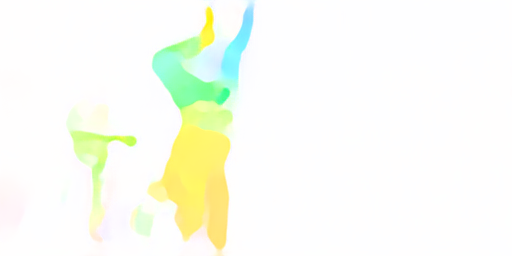

In [7]:
forward = F.interpolate(model(scaled_prev_image, scaled_curr_image), size=[w, h])
tensor_to_pil_image(flow_tensor_to_image_tensor(forward))

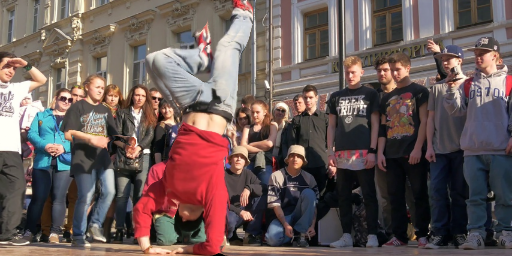

In [8]:
tensor_to_pil_image(warp_tensor(curr_image, normalize_flow(forward)))

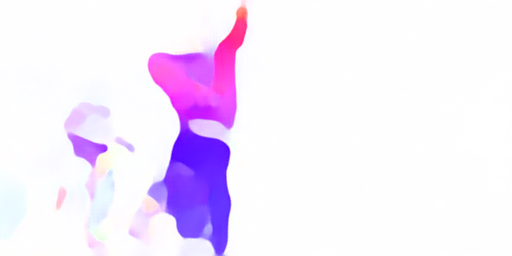

In [9]:
backward = F.interpolate(model(scaled_curr_image, scaled_prev_image), size=[w, h])
tensor_to_pil_image(flow_tensor_to_image_tensor(backward))

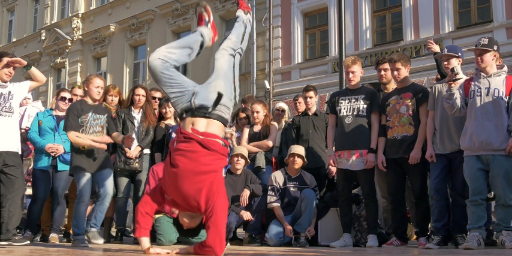

In [10]:
tensor_to_pil_image(warp_tensor(prev_image, normalize_flow(backward)))